## Visualising Data with matplotlib

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

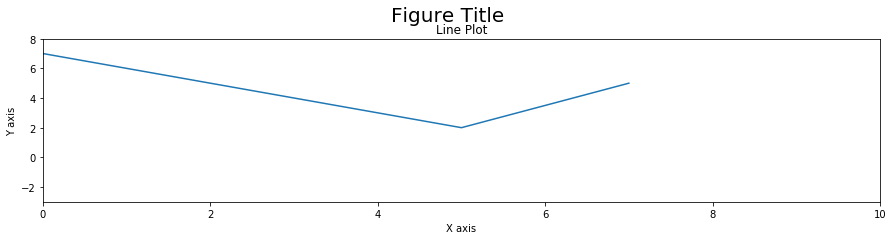

In [96]:
x = [-3, 5, 7]
y = [10, 2, 5]

#trying to use matpltlib OOP method
fig,ax = plt.subplots(figsize=(15,3))
ax.plot(x,y)
ax.set_xlim(0,10)
ax.set_ylim(-3,8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03);



## Create a data visualization
- Read in the movie dataset
- Calculate the median budget for each year
- Find the five year rolling average to smooth the data

In [101]:
path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
movie_path = path + 'movie.csv'
movie = pd.read_csv(movie_path)

In [102]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [103]:
med_budget = movie.groupby('title_year')['budget'].median()
med_budget.tail()

title_year
2012.0    17000000.0
2013.0    20000000.0
2014.0    15000000.0
2015.0    14400000.0
2016.0    22500000.0
Name: budget, dtype: float64

In [104]:
med_budget_roll = med_budget.rolling(5,min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20893000.0
2013.0    19893000.0
2014.0    19100000.0
2015.0    17980000.0
2016.0    17780000.0
Name: budget, dtype: float64

In [105]:
#put the data into numpy arrays
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [106]:
budget = med_budget_roll.values
budget[-5:]

array([20893000., 19893000., 19100000., 17980000., 17780000.])

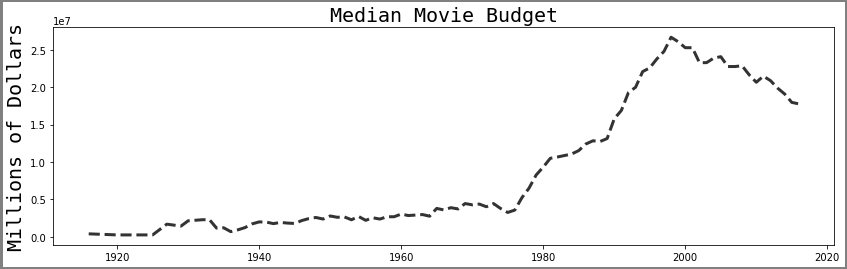

In [107]:
#create the plot
fig,ax = plt.subplots(figsize=(14,4),linewidth=5,edgecolor='.5')
ax.plot(years,budget,linestyle='--',linewidth=3,color='.2',label='All Movies');
text_kwargs=dict(fontsize=20,family='monospace');
ax.set_title('Median Movie Budget',**text_kwargs);
ax.set_ylabel('Millions of Dollars', **text_kwargs);

In [108]:
movie_count = movie.groupby('title_year')['budget'].count() 
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

Want to add movie counts to the plot

Scale the movie counts to be in the same range as the budget so can plot on same scale - label each bar with its value as text, directly preceding it

In [109]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()
fifth_year = (years % 5==0) & (years >=1970)
years_5 = years[fifth_year]
#use boolean to get ct for every fifth year from 1970
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]


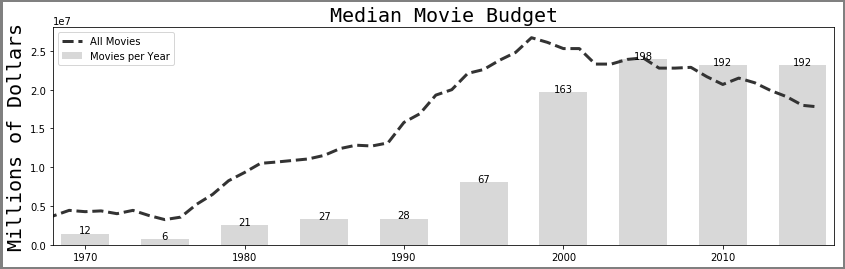

In [110]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5',alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [111]:
ct_5

array([ 12,   6,  21,  27,  28,  67, 163, 198, 192, 192], dtype=int64)

## Adding a subplot

In [112]:
#look at top 10 budgeted movies per year and plot add to previous plot by subplotting
top10 = movie.sort_values('budget',ascending=False).groupby('title_year')['budget'].apply(lambda x:x.iloc[:10].median()/1e6)

In [113]:
top10_roll = top10.rolling(5, min_periods=1).mean()

top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

Text(0,0.6,'Millions of Dollars')

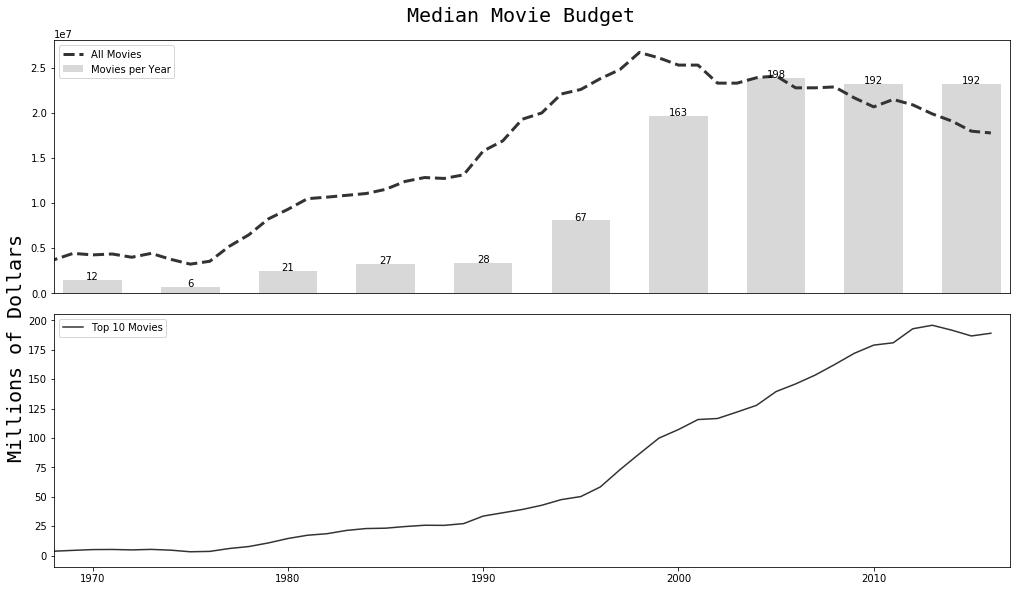

In [115]:
fig2, ax_array = plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years,budget,linestyle='--',linewidth=3,color='.2',label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5',alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968,2017)
plt.setp(ax1.get_xticklines(),visible=False)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2',label='Top 10 Movies')
ax2.legend(loc='upper left')
fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical',ha='center', **text_kwargs)
#import os
#path = os.path.expanduser('~/Desktop/movie_budget.png')
#fig2.savefig(path, bbox_inches='tight')


## Using Pandas

Create a scatter plot of the IMDB score against the year for a random selection of 100
movies made from 2000 onwards. The sizes of each point are proportional to the budget:

In [134]:
cols = ['budget','title_year','imdb_score','movie_title']
m = movie[cols].dropna()
m['budget2'] = m['budget']/1e6
np.random.seed(0)

#boolean select movies and take 100 of them
movie_samp = m.query('title_year >= 2000').sample(100)

#same as above - taking into account random sample selection
movie_samp2 = m[m['title_year']>=2000].sample(100)


In [147]:
#getting the min score movie
res = movie_samp['imdb_score'].idxmin()
movie_samp.loc[res]

budget           1.5e+06
title_year          2015
imdb_score           3.1
movie_title    Checkmate
budget2              1.5
Name: 4348, dtype: object

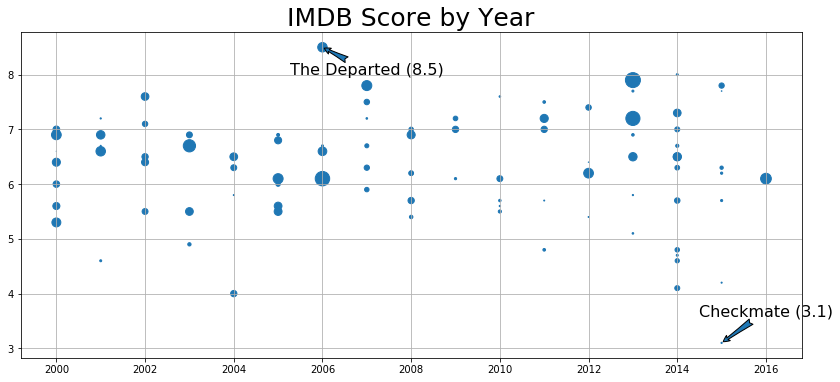

In [142]:
fig, ax = plt.subplots(figsize=(14,6))
#scatter plot of year and score, using budget as size of marker
ax.scatter(x='title_year', y='imdb_score',s='budget2', data=movie_samp);
idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    #highest and lowest scoring movies are labeled with the annotate method.
    #xy parameter is a tuple of the point that we would like to annotate
    ax.annotate(xy=(year, score),
    #xytext parameter is another tuple coordinate of the text location. The text is centered
    #there due to ha being set to center.
    xytext=(year + 1, score + offset),
    s=title + ' ({})'.format(score),
    ha='center',
    size=16,
    arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

In [145]:
res = movie_samp['imdb_score'].idxmin()

In [146]:
movie_samp.loc[res]

budget           1.5e+06
title_year          2015
imdb_score           3.1
movie_title    Checkmate
budget2              1.5
Name: 4348, dtype: object